In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow_datasets as tfds

%matplotlib inline

In [4]:
imdb, info = tfds.load('imdb_reviews', with_info = True, as_supervised = True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteJ9CGGY/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteJ9CGGY/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteJ9CGGY/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


dict

In [5]:
type(imdb)

dict

In [6]:
info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/plain_text/1.0.0',
    description="""
    Large Movie Review Dataset. This is a dataset for binary sentiment
    classification containing substantially more data than previous benchmark
    datasets. We provide a set of 25,000 highly polar movie reviews for training,
    and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Plain text
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_dir=PosixGPath('/tmp/tmpsc09_ktbtfds'),
    file_format=tfrecord,
    download_size=80.23 MiB,
    dataset_size=129.83 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
        'text': Text(shape=(), dtype=string),
    }),
    supervised_keys=('text', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=25000, num_shards=1>,
        'train': <SplitInfo

In [9]:
imdb.keys()

dict_keys([Split('train'), Split('test'), Split('unsupervised')])

In [10]:
train_data = imdb['train']
test_data  = imdb['test']

print(type(train_data))
print(type(test_data))

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


In [11]:
print('Training Data Size : ', len(train_data))
print('Testing  Data Size : ', len(test_data))

Training Data Size :  25000
Testing  Data Size :  25000


In [12]:
count = 1
for review, label in train_data:
  if count > 5:
    break
  print(review)
  print(label)
  print('\n','='*100)
  count += 1

tf.Tensor(b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.", shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)

tf.Tensor(b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on 

In [13]:
count = 1
for review, label in test_data:
  if count > 5:
    break
  print(review)
  print(label)
  print('\n', '='*100)
  count+=1

tf.Tensor(b"There are films that make careers. For George Romero, it was NIGHT OF THE LIVING DEAD; for Kevin Smith, CLERKS; for Robert Rodriguez, EL MARIACHI. Add to that list Onur Tukel's absolutely amazing DING-A-LING-LESS. Flawless film-making, and as assured and as professional as any of the aforementioned movies. I haven't laughed this hard since I saw THE FULL MONTY. (And, even then, I don't think I laughed quite this hard... So to speak.) Tukel's talent is considerable: DING-A-LING-LESS is so chock full of double entendres that one would have to sit down with a copy of this script and do a line-by-line examination of it to fully appreciate the, uh, breadth and width of it. Every shot is beautifully composed (a clear sign of a sure-handed director), and the performances all around are solid (there's none of the over-the-top scenery chewing one might've expected from a film like this). DING-A-LING-LESS is a film whose time has come.", shape=(), dtype=string)
tf.Tensor(1, shape=(),

In [14]:
training_sentences = []
training_labels = []
testing_sentences = []
testing_labels = []

In [15]:
for review, label in train_data:
  training_sentences.append(review.numpy().decode('utf8'))
  training_labels.append(label.numpy())

In [16]:
for review, label in test_data:
  testing_sentences.append(review.numpy().decode('utf8'))
  testing_labels.append(label.numpy())

In [17]:
training_labels = np.array(training_labels)
testing_labels  = np.array(testing_labels)

In [18]:
for review in training_sentences[:5]:
  print(review)
  print('\n')

This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.


I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was co

In [19]:
for review in testing_sentences[:5]:
  print(review)
  print('\n')

There are films that make careers. For George Romero, it was NIGHT OF THE LIVING DEAD; for Kevin Smith, CLERKS; for Robert Rodriguez, EL MARIACHI. Add to that list Onur Tukel's absolutely amazing DING-A-LING-LESS. Flawless film-making, and as assured and as professional as any of the aforementioned movies. I haven't laughed this hard since I saw THE FULL MONTY. (And, even then, I don't think I laughed quite this hard... So to speak.) Tukel's talent is considerable: DING-A-LING-LESS is so chock full of double entendres that one would have to sit down with a copy of this script and do a line-by-line examination of it to fully appreciate the, uh, breadth and width of it. Every shot is beautifully composed (a clear sign of a sure-handed director), and the performances all around are solid (there's none of the over-the-top scenery chewing one might've expected from a film like this). DING-A-LING-LESS is a film whose time has come.


A blackly comic tale of a down-trodden priest, Nazarin sho

In [20]:
print(training_labels[:5])
print(testing_labels[:5])

[0 0 0 1 1]
[1 1 0 0 1]


In [21]:
print('Total training reviews : ', len(training_sentences))
print('Total training labels  : ', len(training_labels))
print('Total testing reviews  : ', len(testing_sentences))
print('Total testing labels   : ', len(testing_labels))

Total training reviews :  25000
Total training labels  :  25000
Total testing reviews  :  25000
Total testing labels   :  25000


----

In [22]:
# Tokenization
tokenizer = Tokenizer(num_words = 10000, oov_token = '#OOV')
tokenizer.fit_on_texts(training_sentences)

In [23]:
# Sequencing
training_sequences = tokenizer.texts_to_sequences(training_sentences)
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)

In [24]:
# Padding
padded_training_seq = pad_sequences(training_sequences, maxlen = 150, truncating = 'post', padding = 'post')
padded_testing_seq  = pad_sequences(testing_sequences, maxlen = 150, truncating = 'post', padding = 'post')

In [26]:
print('Training data shape   : ', padded_training_seq.shape)
print('Training labels shape : ', training_labels.shape)
print('Testing data shape    : ', padded_testing_seq.shape)
print('Testing labels shape  : ', testing_labels.shape)

Training data shape   :  (25000, 150)
Training labels shape :  (25000,)
Testing data shape    :  (25000, 150)
Testing labels shape  :  (25000,)


---
---
## Training an LSTM model

In [33]:
from tensorflow.keras.layers import Embedding, Bidirectional, Dense, LSTM, Dropout

model = tf.keras.Sequential()
model.add(Embedding(10000, 16, input_length = 150))
model.add(Bidirectional(LSTM(16)))

model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.6))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 16)           160000    
                                                                 
 bidirectional_1 (Bidirecti  (None, 32)                4224      
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 164769 (643.63 KB)
Trainable params: 164769 (643.63 KB)
Non-trainable params: 0 (0.00 Byte)
______________

In [34]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [35]:
history = model.fit(
    padded_training_seq,
    training_labels,
    validation_data = (padded_testing_seq, testing_labels),
    epochs = 10
)

Epoch 1/10
782/782 [==============================] - 41s 47ms/step - loss: 0.5135 - accuracy: 0.7404 - val_loss: 0.3889 - val_accuracy: 0.8367
Epoch 2/10
782/782 [==============================] - 18s 23ms/step - loss: 0.3346 - accuracy: 0.8801 - val_loss: 0.3762 - val_accuracy: 0.8274
Epoch 3/10
782/782 [==============================] - 16s 20ms/step - loss: 0.2716 - accuracy: 0.9102 - val_loss: 0.4241 - val_accuracy: 0.8280
Epoch 4/10
782/782 [==============================] - 16s 21ms/step - loss: 0.2292 - accuracy: 0.9244 - val_loss: 0.5174 - val_accuracy: 0.8281
Epoch 5/10
782/782 [==============================] - 15s 20ms/step - loss: 0.1965 - accuracy: 0.9352 - val_loss: 0.5396 - val_accuracy: 0.8238
Epoch 6/10
782/782 [==============================] - 15s 19ms/step - loss: 0.1671 - accuracy: 0.9493 - val_loss: 0.5056 - val_accuracy: 0.8181
Epoch 7/10
782/782 [==============================] - 16s 20ms/step - loss: 0.1346 - accuracy: 0.9601 - val_loss: 0.6235 - val_accuracy:

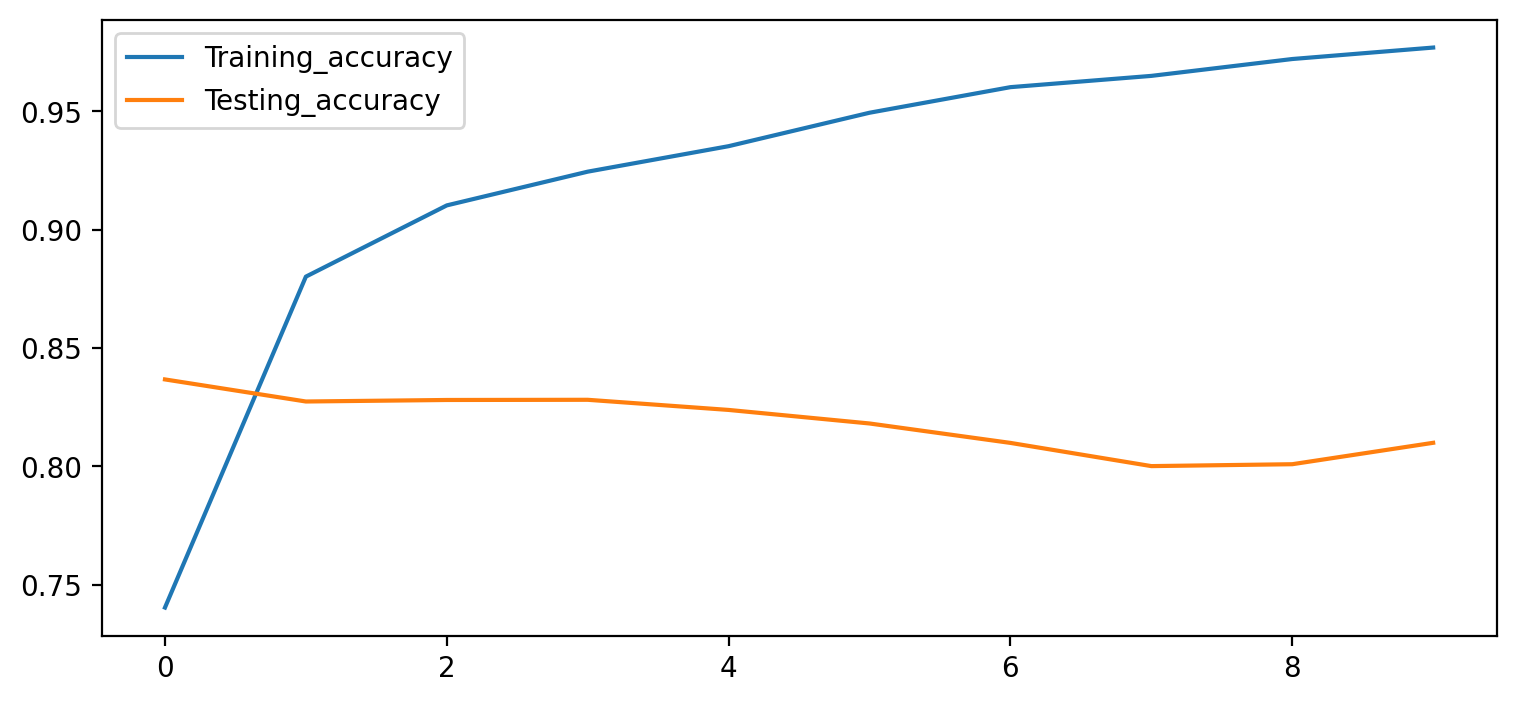

In [36]:
train_acc = history.history['accuracy']
val_acc   = history.history['val_accuracy']

plt.figure(figsize = (9,4), dpi = 200)
plt.plot(train_acc, label = 'Training_accuracy')
plt.plot(val_acc, label = 'Testing_accuracy')
plt.legend()

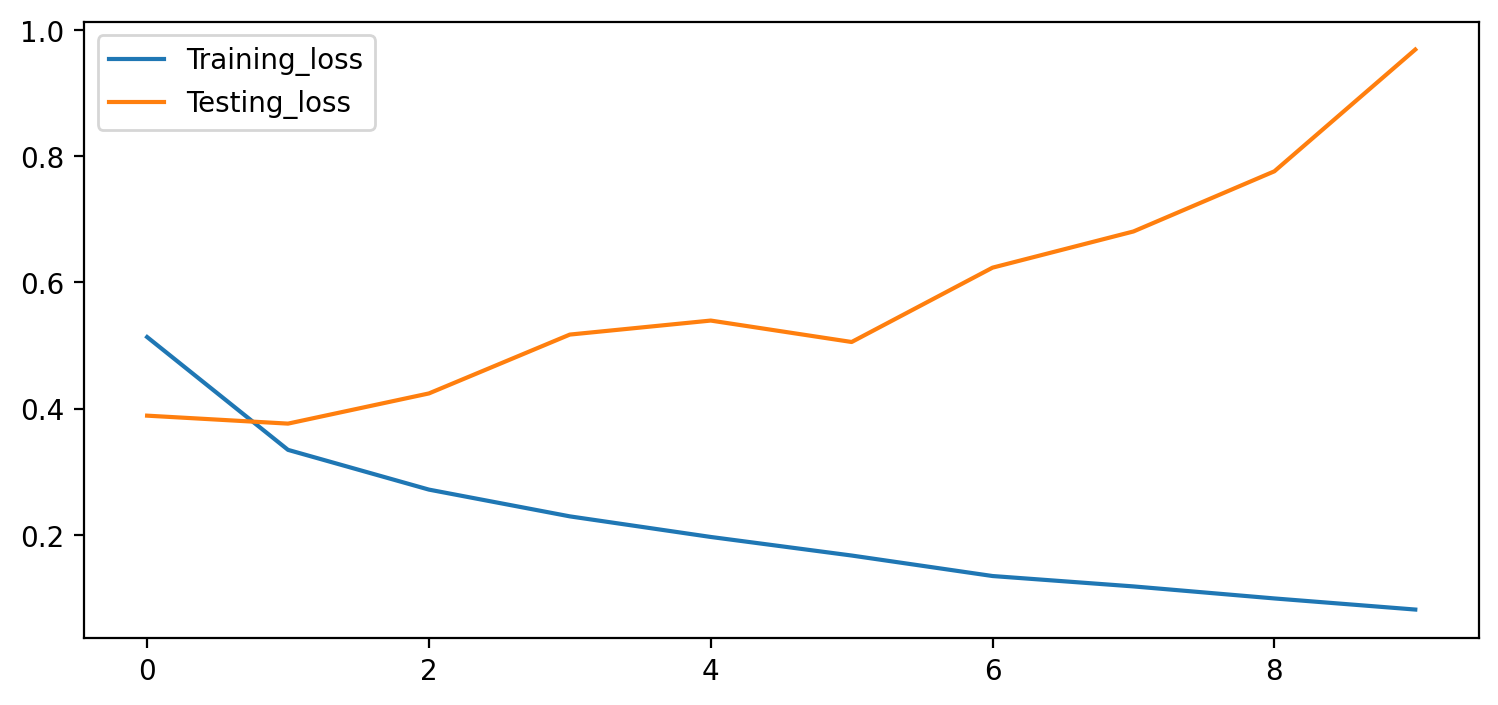

In [37]:
train_loss = history.history['loss']
val_loss   = history.history['val_loss']

plt.figure(figsize = (9,4), dpi = 200)
plt.plot(train_loss, label = 'Training_loss')
plt.plot(val_loss, label = 'Testing_loss')
plt.legend()